<a href="https://colab.research.google.com/github/HamdanXI/nlp_adventure/blob/main/gsrc/final_data_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download en_core_web_sm

In [19]:
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [17]:
def load_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
    return pd.DataFrame(lines, columns=['text'])

def prepare_data(gloss_path, text_path):
  asl_df = load_text_file(gloss_path)
  text_df = load_text_file(text_path)
  asl_df.columns = ['gloss']
  df = pd.concat([text_df, asl_df], axis=1)
  df['text'] = df['text'].apply(lambda x: '' if pd.isnull(x) else str(x))
  df['gloss'] = df['gloss'].apply(lambda x: '' if pd.isnull(x) else str(x))
  return df

def difference_between_gloss_and_text_count(df):
  df['text_count'] = df['text'].apply(lambda x: len(x.split()))
  df['gloss_count'] = df['gloss'].apply(lambda x: len(x.split()))
  df['count_difference'] = df['text_count'] - df['gloss_count']
  average_difference = df['count_difference'].mean()
  plt.figure(figsize=(10, 6))
  plt.hist(df['count_difference'], bins=range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 1, 1), alpha=0.7, color='skyblue', edgecolor='black')
  plt.xlabel('Difference Between Gloss Count and Text Count')
  plt.ylabel('Number of Sentences')
  plt.title('Distribution of Difference Between Gloss Count and Text Count')
  plt.xticks(range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 2, 1))
  plt.grid(axis='y', linestyle='--')
  plt.show()

def analyze_complexity(text):
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    num_tokens = len(doc)
    pos_counts = Counter(token.pos_ for token in doc)
    return num_sentences, num_tokens, dict(pos_counts)

def compare_complexity(df):
  df['text_complexity'] = df['text'].apply(analyze_complexity)
  df['gloss_complexity'] = df['gloss'].apply(analyze_complexity)
  text_complexity_columns = df['text_complexity'].apply(pd.Series)
  text_complexity_columns.columns = ['text_num_sentences', 'text_num_tokens', 'text_pos_counts']
  gloss_complexity_columns = df['gloss_complexity'].apply(pd.Series)
  gloss_complexity_columns.columns = ['gloss_num_sentences', 'gloss_num_tokens', 'gloss_pos_counts']
  df = pd.concat([df, text_complexity_columns, gloss_complexity_columns], axis=1)
  df.drop(['text_complexity', 'gloss_complexity'], axis=1, inplace=True)
  average_text_tokens = df['text_num_tokens'].mean()
  average_gloss_tokens = df['gloss_num_tokens'].mean()
  categories = ['Text', 'Gloss']
  averages = [average_text_tokens, average_gloss_tokens]
  plt.figure(figsize=(10, 6))
  plt.bar(categories, averages, color=['blue', 'green'])
  plt.xlabel('Category')
  plt.ylabel('Average Number of Tokens')
  plt.title('Comparison of Average Number of Tokens')
  plt.xticks(categories)
  plt.ylim(0, max(averages) + 5)
  for i, value in enumerate(averages):
    plt.text(i, value + 1, f"{value:.2f}", ha='center')
  plt.show()

  # Aggregating POS counts
  text_pos_aggregate = defaultdict(int)
  gloss_pos_aggregate = defaultdict(int)

  for row in df.itertuples():
    for pos, count in row.text_pos_counts.items():
        text_pos_aggregate[pos] += count
    for pos, count in row.gloss_pos_counts.items():
        gloss_pos_aggregate[pos] += count

  pos_comparison_df = pd.DataFrame([text_pos_aggregate, gloss_pos_aggregate], index=['Text', 'Gloss']).T

  pos_comparison_df.plot(kind='bar', figsize=(14, 7), width=0.8)
  plt.title('Comparison of POS Tags between Text and Gloss')
  plt.xlabel('POS Tags')
  plt.ylabel('Counts')
  plt.xticks(rotation=45)
  plt.legend(title='Source')
  plt.grid(axis='y', linestyle='--')
  plt.tight_layout()

  plt.show()

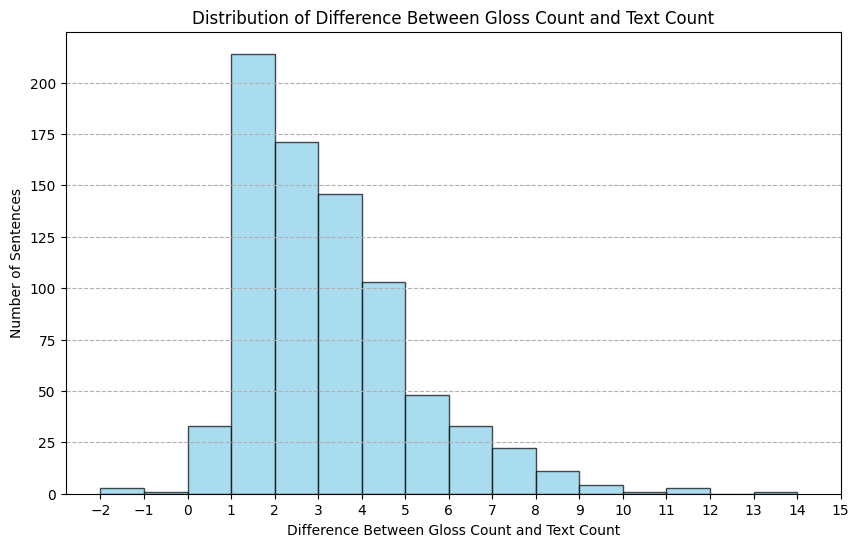

In [13]:
df_aslg = prepare_data('corpus_0008.clean.asl.txt', 'corpus_0008.clean.en.txt')
difference_between_gloss_and_text_count(df_aslg)

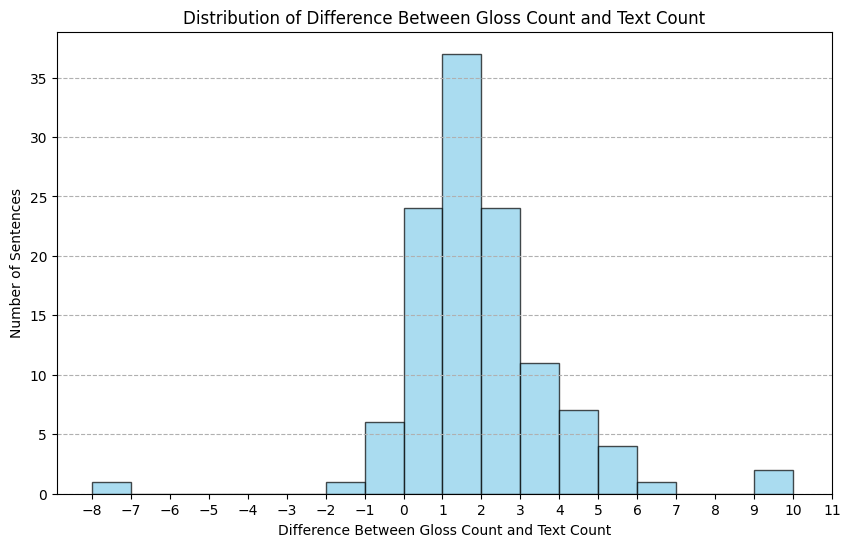

In [14]:
df_selfmade = prepare_data('gloss.txt', 'text.txt')
difference_between_gloss_and_text_count(df_selfmade)

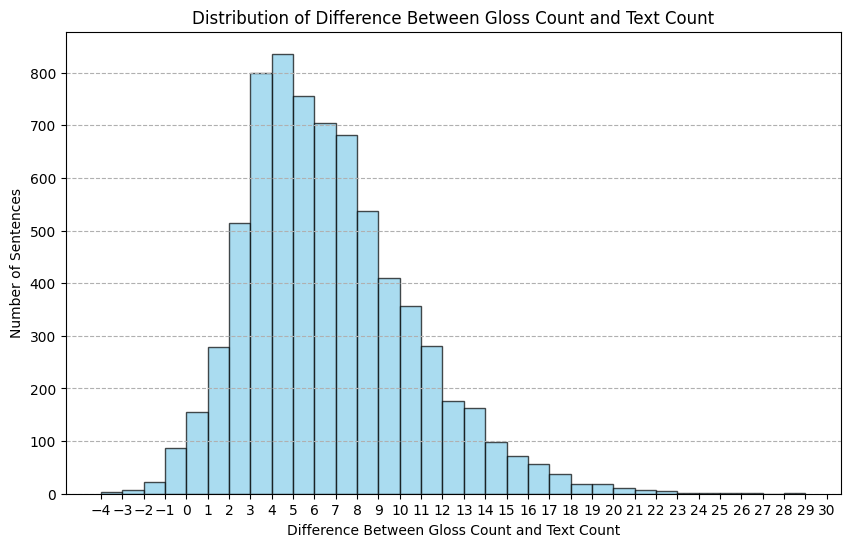

In [16]:
df_pheonix = prepare_data('phoenix_train_glosses.txt', 'phoenix_train_sentences.txt')
difference_between_gloss_and_text_count(df_pheonix)

In [15]:
# Print Sentence Difference Row

sentences_diff_minus = df_selfmade[df_selfmade['count_difference'] == -8]

for index, row in sentences_diff_minus.iterrows():
    print(f"Row {index}: {row['text']}")
    print(f"Row {index}: {row['gloss']}")

Row 111: I looked at the message.
Row 111: MESSAGE (CL: closed 5, Non-Dominant hand, act like looking at text on phone)


## Comparing Text and Gloss Complexity

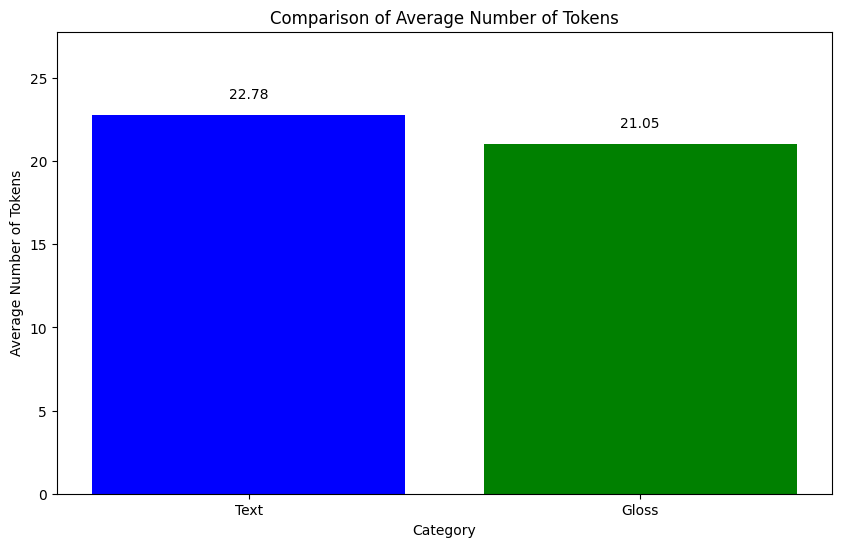

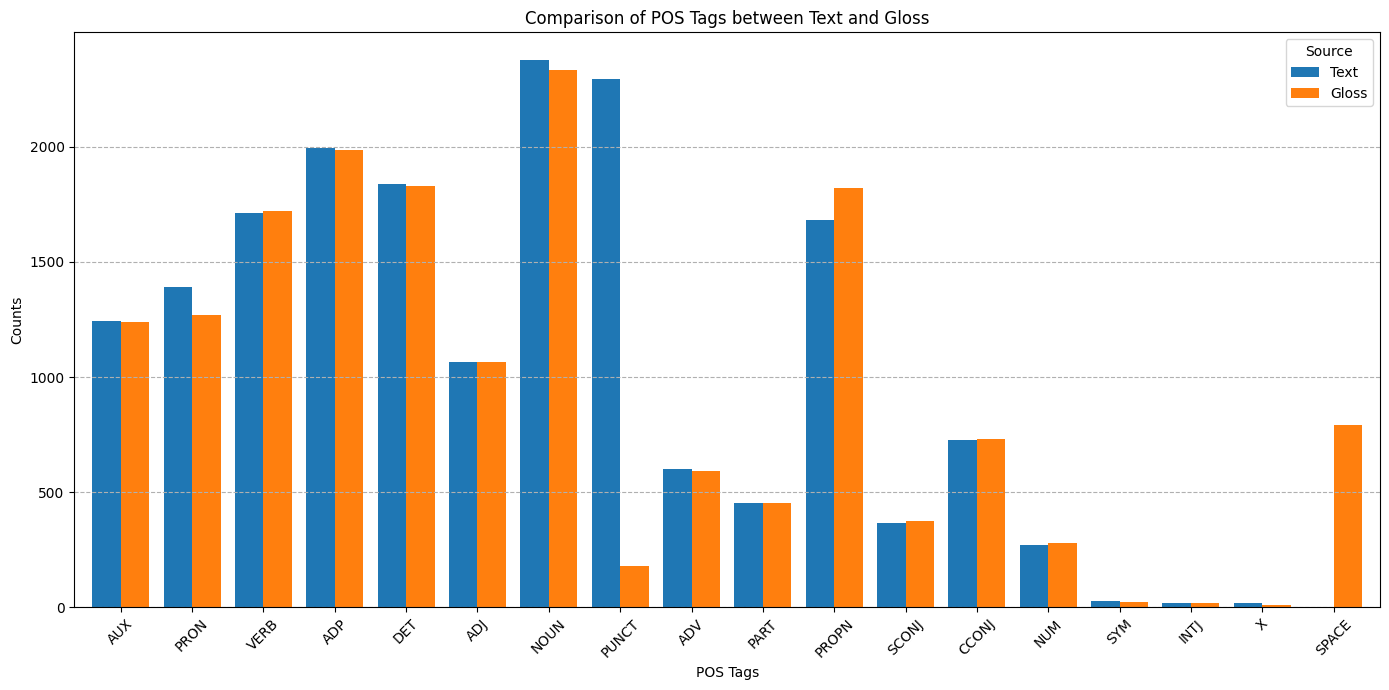

In [20]:
compare_complexity(df_aslg)

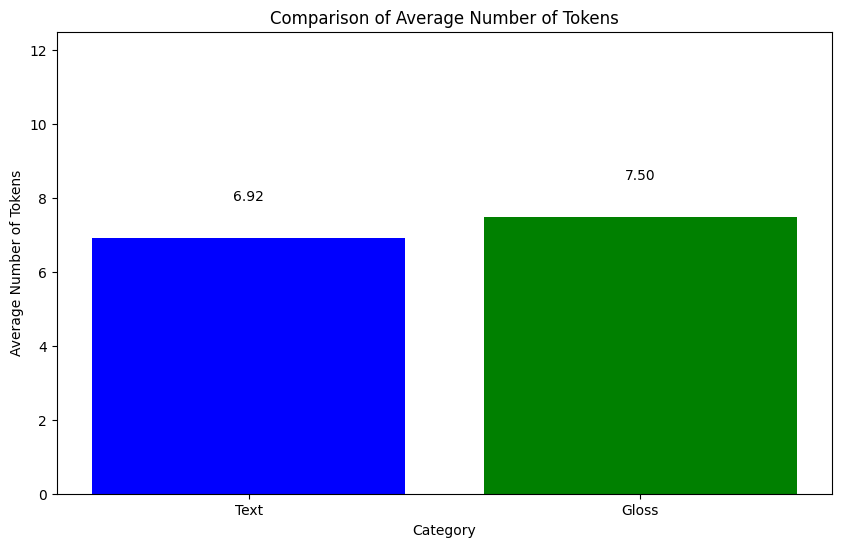

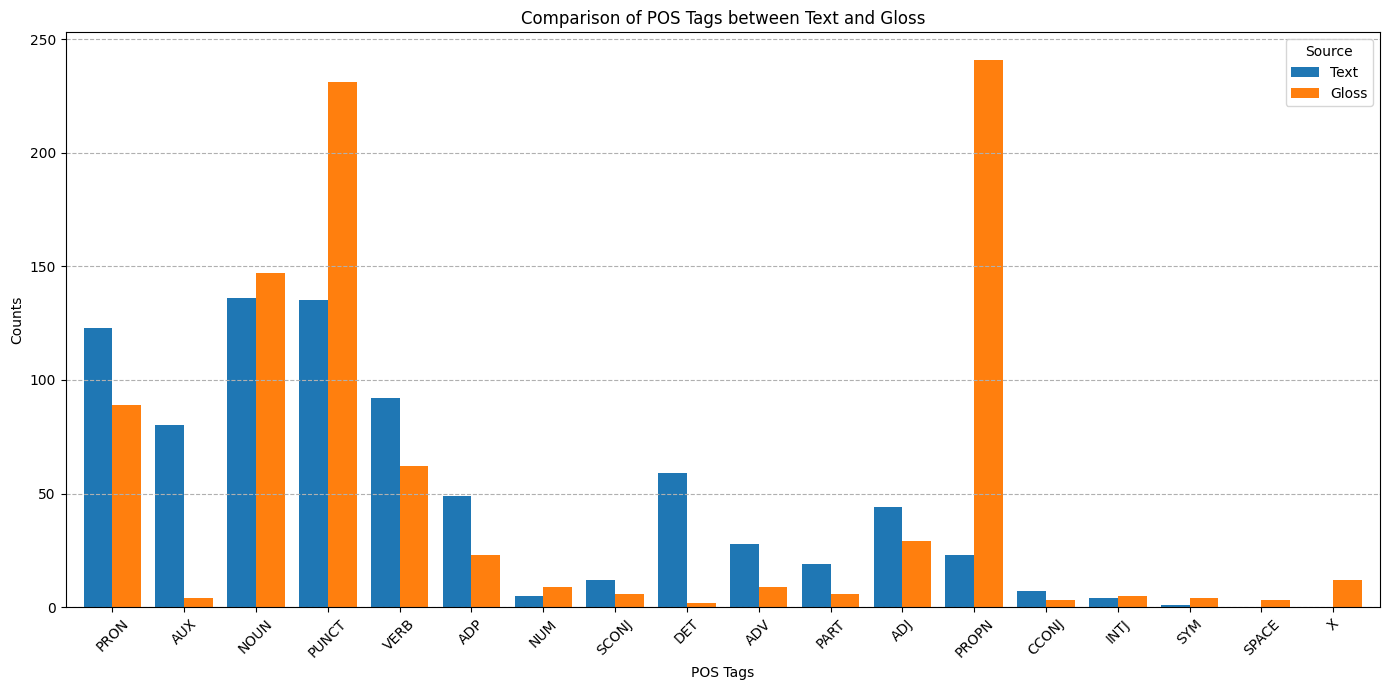

In [21]:
compare_complexity(df_selfmade)

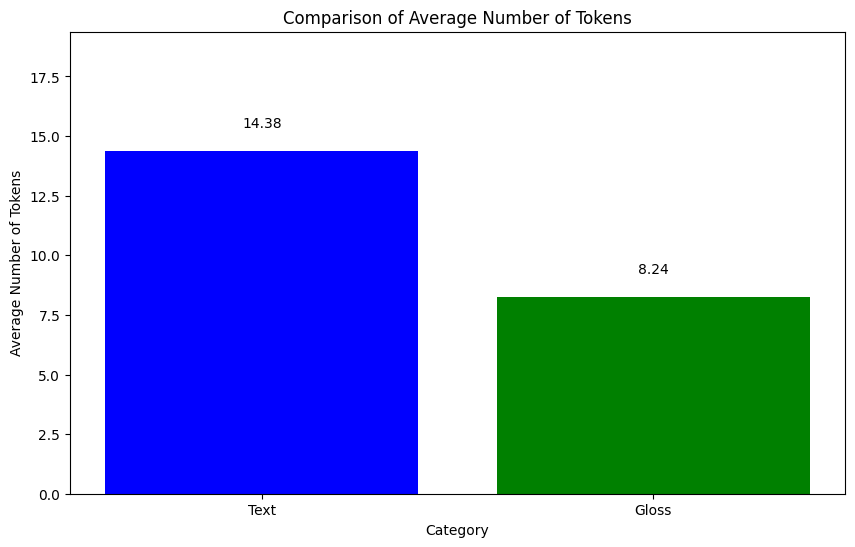

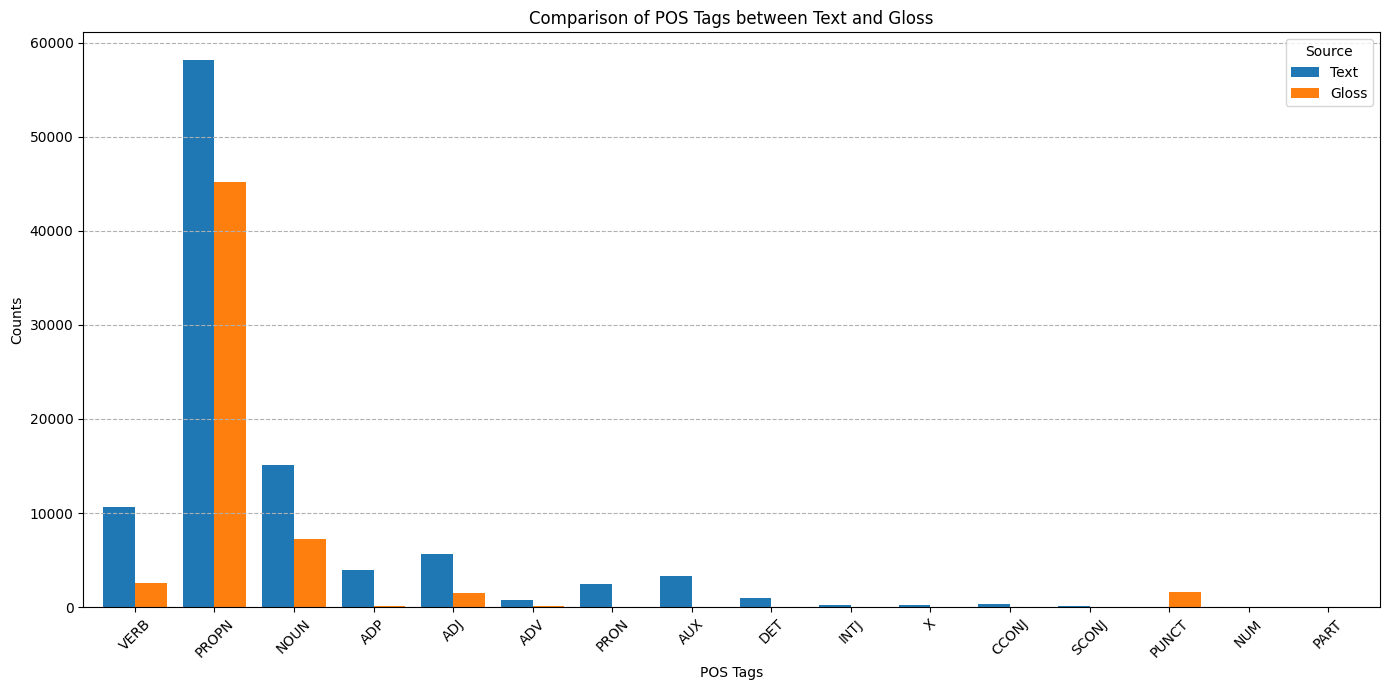

In [22]:
compare_complexity(df_pheonix)